# Exercise
Get information from webpage with beautiful soup.
- https://www.crummy.com/software/BeautifulSoup/bs4/doc/#
- https://www.geeksforgeeks.org/python-web-scraping-tutorial/
- https://github.com/html5lib/html5lib-python

- Get the links with python job posts from this page: https://realpython.github.io/fake-jobs/
- Visualize job types.
- (Optinal) Get another info from website you've chosen, If you have more time for this study.

In [40]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
url = "https://realpython.github.io/fake-jobs/"
text = requests.get(url)

In [3]:
my_soup = BeautifulSoup(text.content, 'html.parser')

In [4]:
type(my_soup)

bs4.BeautifulSoup

In [5]:
print(my_soup.prettify())

<!DOCTYPE html>
<html>
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title>
   Fake Python
  </title>
  <link href="https://cdn.jsdelivr.net/npm/bulma@0.9.2/css/bulma.min.css" rel="stylesheet"/>
 </head>
 <body>
  <section class="section">
   <div class="container mb-5">
    <h1 class="title is-1">
     Fake Python
    </h1>
    <p class="subtitle is-3">
     Fake Jobs for Your Web Scraping Journey
    </p>
   </div>
   <div class="container">
    <div class="columns is-multiline" id="ResultsContainer">
     <div class="column is-half">
      <div class="card">
       <div class="card-content">
        <div class="media">
         <div class="media-left">
          <figure class="image is-48x48">
           <img alt="Real Python Logo" src="https://files.realpython.com/media/real-python-logo-thumbnail.7f0db70c2ed2.jpg?__no_cf_polish=1"/>
          </figure>
         </div>
         <div class="media-content">
          <h2 c

In [6]:
for link in my_soup.find_all('a'): 
    print(link.get('href'))

https://www.realpython.com
https://realpython.github.io/fake-jobs/jobs/senior-python-developer-0.html
https://www.realpython.com
https://realpython.github.io/fake-jobs/jobs/energy-engineer-1.html
https://www.realpython.com
https://realpython.github.io/fake-jobs/jobs/legal-executive-2.html
https://www.realpython.com
https://realpython.github.io/fake-jobs/jobs/fitness-centre-manager-3.html
https://www.realpython.com
https://realpython.github.io/fake-jobs/jobs/product-manager-4.html
https://www.realpython.com
https://realpython.github.io/fake-jobs/jobs/medical-technical-officer-5.html
https://www.realpython.com
https://realpython.github.io/fake-jobs/jobs/physiological-scientist-6.html
https://www.realpython.com
https://realpython.github.io/fake-jobs/jobs/textile-designer-7.html
https://www.realpython.com
https://realpython.github.io/fake-jobs/jobs/television-floor-manager-8.html
https://www.realpython.com
https://realpython.github.io/fake-jobs/jobs/waste-management-officer-9.html
https://

In [7]:
job_listings = []

# İş ilanlarının belirli bir HTML yapısı içinde olduğunu varsayalım
for job_elem in my_soup.find_all('div', class_='card-content'):
    title_elem = job_elem.find('h2', class_='title is-5')
    subtitle_elem = job_elem.find('h3', class_='subtitle is-6 company')
    location_elem = job_elem.find('p', class_='location')

    if None in (title_elem, subtitle_elem, location_elem):
        continue  # Eğer gerekli elementlerden biri eksikse bu iş ilanını atla

    job_listings.append({
        'title': title_elem.get_text(strip=True),
        'subtitle': subtitle_elem.get_text(strip=True),
        'location': location_elem.get_text(strip=True)
    })

# İş ilanlarını görselleştir
for job in job_listings:
    print(f"İş: {job['title']}")
    print(f"Şirket: {job['subtitle']}")
    print(f"Lokasyon: {job['location']}")
    print("-" * 30)

İş: Senior Python Developer
Şirket: Payne, Roberts and Davis
Lokasyon: Stewartbury, AA
------------------------------
İş: Energy engineer
Şirket: Vasquez-Davidson
Lokasyon: Christopherville, AA
------------------------------
İş: Legal executive
Şirket: Jackson, Chambers and Levy
Lokasyon: Port Ericaburgh, AA
------------------------------
İş: Fitness centre manager
Şirket: Savage-Bradley
Lokasyon: East Seanview, AP
------------------------------
İş: Product manager
Şirket: Ramirez Inc
Lokasyon: North Jamieview, AP
------------------------------
İş: Medical technical officer
Şirket: Rogers-Yates
Lokasyon: Davidville, AP
------------------------------
İş: Physiological scientist
Şirket: Kramer-Klein
Lokasyon: South Christopher, AE
------------------------------
İş: Textile designer
Şirket: Meyers-Johnson
Lokasyon: Port Jonathan, AE
------------------------------
İş: Television floor manager
Şirket: Hughes-Williams
Lokasyon: Osbornetown, AE
------------------------------
İş: Waste managem

In [8]:
job_listings = []
# İş ilanlarının belirli bir HTML yapısı içinde olduğunu varsayalım 
for job_elem in my_soup.find_all('div', class_='card-content'):
    title_elem = job_elem.find('h2', class_='title is-5')
    subtitle_elem = job_elem.find('h3', class_='subtitle is-6 company')
    location_elem = job_elem.find('p', class_='location')

    if None in (title_elem, subtitle_elem, location_elem):
        continue  # Eğer gerekli elementlerden biri eksikse bu iş ilanını atla

    title_text = title_elem.get_text(strip=True)

    # Sadece Python içeren başlıkları ekleyelim
    if 'Python' in title_text:
        subtitle_text = subtitle_elem.get_text(strip=True)
        location_text = location_elem.get_text(strip=True)

        job_listings.append({
            'title': title_text,
            'subtitle': subtitle_text,
            'location': location_text
        })

# Sadece Python içeren iş ilanlarını yaz
for job in job_listings:
    print(f"İş: {job['title']}")
    print(f"Şirket: {job['subtitle']}")
    print(f"Lokasyon: {job['location']}")
    print("-" * 30)

İş: Senior Python Developer
Şirket: Payne, Roberts and Davis
Lokasyon: Stewartbury, AA
------------------------------
İş: Software Engineer (Python)
Şirket: Garcia PLC
Lokasyon: Ericberg, AE
------------------------------
İş: Python Programmer (Entry-Level)
Şirket: Moss, Duncan and Allen
Lokasyon: Port Sara, AE
------------------------------
İş: Python Programmer (Entry-Level)
Şirket: Cooper and Sons
Lokasyon: West Victor, AE
------------------------------
İş: Software Developer (Python)
Şirket: Adams-Brewer
Lokasyon: Brockburgh, AE
------------------------------
İş: Python Developer
Şirket: Rivera and Sons
Lokasyon: East Michaelfort, AA
------------------------------
İş: Back-End Web Developer (Python, Django)
Şirket: Stewart-Alexander
Lokasyon: South Kimberly, AA
------------------------------
İş: Back-End Web Developer (Python, Django)
Şirket: Jackson, Ali and Mckee
Lokasyon: New Elizabethside, AA
------------------------------
İş: Python Programmer (Entry-Level)
Şirket: Mathews Inc

In [9]:
from wordcloud import WordCloud

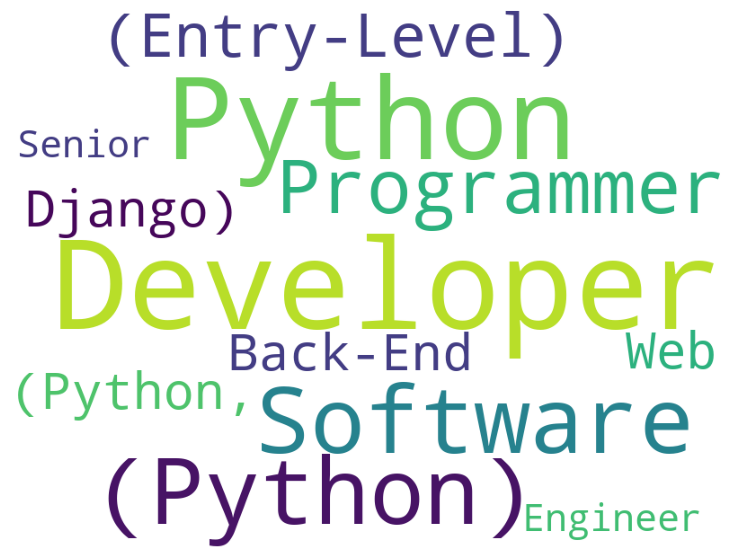

In [10]:
from collections import Counter

# İş başlıklarından kelime frekanslarını hesapla
all_job_titles = " ".join(job['title'] for job in job_listings)
word_freq = Counter(all_job_titles.split())

# İlk 20 kelimeyi seç
res = word_freq.most_common(20)

# WordCloud nesnesini oluştur
wc = WordCloud(background_color='white', width=800, height=600)

# WordCloud'u görselleştir
plt.figure(figsize=(15, 7))
plt.imshow(wc.generate_from_frequencies({k: v for k, v in res}))
plt.axis("off")
plt.show()


##### lambda text: Bu, bir lambda fonksiyonunu tanımlar. Lambda fonksiyonları, genellikle kısa süreli kullanımlar için anonim (isimsiz) fonksiyonlar oluşturmak için kullanılır. text parametresi, her bir etiketin metin içeriğini temsil eder.

##### "python" in text.lower(): Bu ifade, metin içeriğinde "python" kelimesinin bulunup bulunmadığını kontrol eder. text.lower() ifadesi, metni küçük harfe çevirir. Bu, "Python" kelimesini büyük harfle veya karışık büyük küçük harfle yazılmış olsa bile tespit edebilmek için kullanılır.

##### Örneğin, eğer bir etiketin metni "Python Developer" ise, text.lower() ifadesi bu metni "python developer" olarak çevirir ve ardından "python" kelimesini içerip içermediğini kontrol eder. Bu, büyük-küçük harf duyarlılığını ortadan kaldırarak arama işlemini genişletir.

In [32]:
 # Sadece Python içeren başlıkları ekleyelim
python_jobs = my_soup.find_all(
"h2", string=lambda text: "python" in text.lower()
)

for job in python_jobs:
    print(job)

<h2 class="title is-5">Senior Python Developer</h2>
<h2 class="title is-5">Software Engineer (Python)</h2>
<h2 class="title is-5">Python Programmer (Entry-Level)</h2>
<h2 class="title is-5">Python Programmer (Entry-Level)</h2>
<h2 class="title is-5">Software Developer (Python)</h2>
<h2 class="title is-5">Python Developer</h2>
<h2 class="title is-5">Back-End Web Developer (Python, Django)</h2>
<h2 class="title is-5">Back-End Web Developer (Python, Django)</h2>
<h2 class="title is-5">Python Programmer (Entry-Level)</h2>
<h2 class="title is-5">Software Developer (Python)</h2>


In [33]:
python_job_elements = [
    h2_element.parent.parent.parent for h2_element in python_jobs
]

In [34]:
for job_element in python_job_elements:
    links = job_element.find_all('a')
    for link in links:
        if link.text == "Apply":
            print(link)

<a class="card-footer-item" href="https://realpython.github.io/fake-jobs/jobs/senior-python-developer-0.html" target="_blank">Apply</a>
<a class="card-footer-item" href="https://realpython.github.io/fake-jobs/jobs/software-engineer-python-10.html" target="_blank">Apply</a>
<a class="card-footer-item" href="https://realpython.github.io/fake-jobs/jobs/python-programmer-entry-level-20.html" target="_blank">Apply</a>
<a class="card-footer-item" href="https://realpython.github.io/fake-jobs/jobs/python-programmer-entry-level-30.html" target="_blank">Apply</a>
<a class="card-footer-item" href="https://realpython.github.io/fake-jobs/jobs/software-developer-python-40.html" target="_blank">Apply</a>
<a class="card-footer-item" href="https://realpython.github.io/fake-jobs/jobs/python-developer-50.html" target="_blank">Apply</a>
<a class="card-footer-item" href="https://realpython.github.io/fake-jobs/jobs/back-end-web-developer-python-django-60.html" target="_blank">Apply</a>
<a class="card-footer

In [35]:
for job_element in python_job_elements:
    links = job_element.find_all('a')
    for link in links:
        if link.text == "Apply":
            link_url = link["href"]
            print(f"Apply here: {link_url}\n")

Apply here: https://realpython.github.io/fake-jobs/jobs/senior-python-developer-0.html

Apply here: https://realpython.github.io/fake-jobs/jobs/software-engineer-python-10.html

Apply here: https://realpython.github.io/fake-jobs/jobs/python-programmer-entry-level-20.html

Apply here: https://realpython.github.io/fake-jobs/jobs/python-programmer-entry-level-30.html

Apply here: https://realpython.github.io/fake-jobs/jobs/software-developer-python-40.html

Apply here: https://realpython.github.io/fake-jobs/jobs/python-developer-50.html

Apply here: https://realpython.github.io/fake-jobs/jobs/back-end-web-developer-python-django-60.html

Apply here: https://realpython.github.io/fake-jobs/jobs/back-end-web-developer-python-django-70.html

Apply here: https://realpython.github.io/fake-jobs/jobs/python-programmer-entry-level-80.html

Apply here: https://realpython.github.io/fake-jobs/jobs/software-developer-python-90.html



In [37]:
job_elements = my_soup.find_all("div", class_="card-content")
jobs_list = []
for job_element in job_elements:
    title_element = job_element.find("h2", class_="title")
    job_title = title_element.text.strip()
    print(job_title)
    jobs_list.append(job_title)

Senior Python Developer
Energy engineer
Legal executive
Fitness centre manager
Product manager
Medical technical officer
Physiological scientist
Textile designer
Television floor manager
Waste management officer
Software Engineer (Python)
Interpreter
Architect
Meteorologist
Audiological scientist
English as a second language teacher
Surgeon
Equities trader
Newspaper journalist
Materials engineer
Python Programmer (Entry-Level)
Product/process development scientist
Scientist, research (maths)
Ecologist
Materials engineer
Historic buildings inspector/conservation officer
Data scientist
Psychiatrist
Structural engineer
Immigration officer
Python Programmer (Entry-Level)
Neurosurgeon
Broadcast engineer
Make
Nurse, adult
Air broker
Editor, film/video
Production assistant, radio
Engineer, communications
Sales executive
Software Developer (Python)
Futures trader
Tour manager
Cytogeneticist
Designer, multimedia
Trade union research officer
Chemist, analytical
Programmer, multimedia
Engineer, b

In [38]:
len(jobs_list)

100

In [41]:
df = pd.DataFrame(jobs_list, columns = ["job_title"])

##### Sample(5), rastgele 5 veriyi yazdırır

In [42]:
df.sample(5)

,job_title
12,Architect
94,Barrister
19,Materials engineer
11,Interpreter
31,Neurosurgeon


In [43]:
df['job_title'].str.lower()

0                senior python developer
1                        energy engineer
2                        legal executive
3                 fitness centre manager
4                        product manager
                     ...                
95    museum/gallery exhibitions officer
96              radiographer, diagnostic
97                database administrator
98                    furniture designer
99                           ship broker
Name: job_title, Length: 100, dtype: object

In [44]:
df['job_title'].str.lower().str.contains("python")

0      True
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Name: job_title, Length: 100, dtype: bool

In [45]:
df[df['job_title'].str.lower().str.contains("python")]

,job_title
0,Senior Python Developer
10,Software Engineer (Python)
20,Python Programmer (Entry-Level)
30,Python Programmer (Entry-Level)
40,Software Developer (Python)
50,Python Developer
60,"Back-End Web Developer (Python, Django)"
70,"Back-End Web Developer (Python, Django)"
80,Python Programmer (Entry-Level)
90,Software Developer (Python)


In [46]:
location_list = []
for job_element in job_elements:
    location_element = job_element.find("p", class_="location")
    location = location_element.text.strip()
    print(location)
    location_list.append(location)

Stewartbury, AA
Christopherville, AA
Port Ericaburgh, AA
East Seanview, AP
North Jamieview, AP
Davidville, AP
South Christopher, AE
Port Jonathan, AE
Osbornetown, AE
Scotttown, AP
Ericberg, AE
Ramireztown, AE
Figueroaview, AA
Kelseystad, AA
Williamsburgh, AE
Mitchellburgh, AE
West Jessicabury, AA
Maloneshire, AE
Johnsonton, AA
South Davidtown, AP
Port Sara, AE
Marktown, AA
Laurenland, AE
Lauraton, AP
South Tammyberg, AP
North Brandonville, AP
Port Robertfurt, AA
Burnettbury, AE
Herbertside, AA
Christopherport, AP
West Victor, AE
Port Aaron, AP
Loribury, AA
Angelastad, AP
Larrytown, AE
West Colin, AP
West Stephanie, AP
Laurentown, AP
Wrightberg, AP
Alberttown, AE
Brockburgh, AE
North Jason, AE
Arnoldhaven, AE
Lake Destiny, AP
South Timothyburgh, AP
New Jimmyton, AE
New Lucasbury, AP
Port Cory, AE
Gileston, AA
Cindyshire, AA
East Michaelfort, AA
Joybury, AE
Emmatown, AE
Colehaven, AP
Port Coryton, AE
Amyborough, AA
Reynoldsville, AA
Port Billy, AP
Adamburgh, AA
Wilsonmouth, AA
South Kimb

In [47]:
location = pd.Series(location_list, name="location")

In [48]:
df["location"] = location

In [49]:
df.sample(5)

,job_title,location
83,Arts development officer,"Philipland, AP"
70,"Back-End Web Developer (Python, Django)","New Elizabethside, AA"
32,Broadcast engineer,"Loribury, AA"
91,"Surveyor, land/geomatics","Joshuatown, AE"
17,Equities trader,"Maloneshire, AE"
